# Permutation Feature Importance

https://towardsdatascience.com/explaining-feature-importance-by-example-of-a-random-forest-d9166011959e \
https://medium.com/turo-engineering/how-not-to-use-random-forest-265a19a68576 \
http://blog.datadive.net/selecting-good-features-part-iii-random-forests/

Randomly permute the feature and measure the decrease in accuracy on an out of bag sample

In [1]:
%matplotlib notebook
import pandas as pd
import numpy as np
import pyexcel_xlsx
%pylab inline
#%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import colors as mcolors
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error

Populating the interactive namespace from numpy and matplotlib


In [13]:
from sklearn.cross_validation import ShuffleSplit
from sklearn.metrics import r2_score
from collections import defaultdict

In [4]:
data = pd.read_excel(r"/Users/lszczyrba/Documents/Research/Projects/PR_Housing/Data/master_df_20191021.xlsx")
df = pd.DataFrame(data)
df.set_index('FIPS', inplace=True)

In [6]:
df.columns

Index(['Prop_SFHA_', 'Prop_DG_Ar', 'Ave_LS_cod', 'DG_MaxDe_1', 'HurTrack_D',
       'PeakGust_1', 'MaxSusta_1', 'Count_', 'StrVI', 'SeVI', 'Str+SeVI',
       'SoVI', 'DG_mean_m', 'O_Ind', 'R_Ind', 'R_I_No0', 'R_I_NoO',
       'R_I_No0_NoO', 'cat_3q', 'cat_4q'],
      dtype='object')

In [7]:
df_x = df.drop(['O_Ind', 'R_Ind', 'R_I_No0', 'R_I_NoO',
       'R_I_No0_NoO', 'cat_3q', 'cat_4q'], axis=1)
df_y = df.R_Ind

In [ ]:
features = df_x.columns.values
X = df_x.as_matrix()
Y = df_y.as_matrix()
scores = defaultdict(list)

rf = RandomForestRegressor()

In [32]:
#crossvalidate the scores on a number of different random splits of the data
for train_idx, test_idx in ShuffleSplit(len(X), 100, .3):
    X_train, X_test = X[train_idx], X[test_idx]
    Y_train, Y_test = Y[train_idx], Y[test_idx]
    r = rf.fit(X_train, Y_train)
    acc = r2_score(Y_test, rf.predict(X_test))
    for i in range(X.shape[1]):
        X_t = X_test.copy()
        np.random.shuffle(X_t[:, i])
        shuff_acc = r2_score(Y_test, rf.predict(X_t))
        scores[features[i]].append((acc-shuff_acc)/acc)


In [33]:
mda_features = [f for f in scores.keys()]
mda_importance = [(np.mean(score)) for score in scores.values()]
mda_indices = np.argsort(mda_importance)

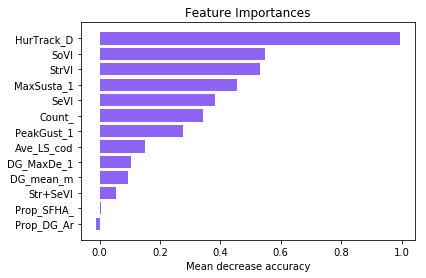

In [34]:
plt.title('Feature Importances')
plt.barh(range(len(mda_indices)), [mda_importance[i] for i in mda_indices], color='#8f63f4', align='center')
plt.yticks(range(len(mda_indices)), [mda_features[i] for i in mda_indices])
plt.xlabel('Mean decrease accuracy')
plt.show()